EV Market Market Analysis


In [157]:
# Importing  libraries 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from tabulate import tabulate
sns.set_style("whitegrid")

Data Loading and Cleaning: Preparing for Analysis


In [158]:
# Load the Data
ev_data = pd.read_csv('Electric_Vehicle_Population_Data.csv')

# Print DataFrame using head() method for better visualization. sort_index() method is more detail since it returns Columns x Rows

ev_data.sort_index()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177861,7SAYGDEE3N,Pierce,Bonney Lake,WA,98391.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,195224452,POINT (-122.183805 47.18062),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
177862,KM8K23AG1P,Mason,Shelton,WA,98584.0,2023,HYUNDAI,KONA ELECTRIC,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,35.0,228454180,POINT (-123.105305 47.211085),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.304596e+10
177863,5YJYGDEE6M,Grant,Quincy,WA,98848.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,13.0,168797219,POINT (-119.8493873 47.2339933),PUD NO 2 OF GRANT COUNTY,5.302501e+10
177864,WVGKMPE27M,King,Black Diamond,WA,98010.0,2021,VOLKSWAGEN,ID.4,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,5.0,182448801,POINT (-122.00451 47.312185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10


Data Types in the Data Set


In [159]:
# Quick use of info() method to gather the dtypes in the document
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

Check if there's duplicated values

In [160]:
# duplicated() method returns a boolean, to check if there's duplicated data
ev_data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
177861    False
177862    False
177863    False
177864    False
177865    False
Length: 177866, dtype: bool

Counting Null Values in the Dataset


In [161]:
# Use the is.null() method to retrieve the values that are null, while .sum() counts and returns the quantity 
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

Eliminating Null Values


In [162]:
# Use the dropna method to eliminate all null values
ev_data = ev_data.dropna()

#Re-use isnull().sum to check data has been cleaned
ev_data.isnull().sum()


VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

EV Adoption Over Time


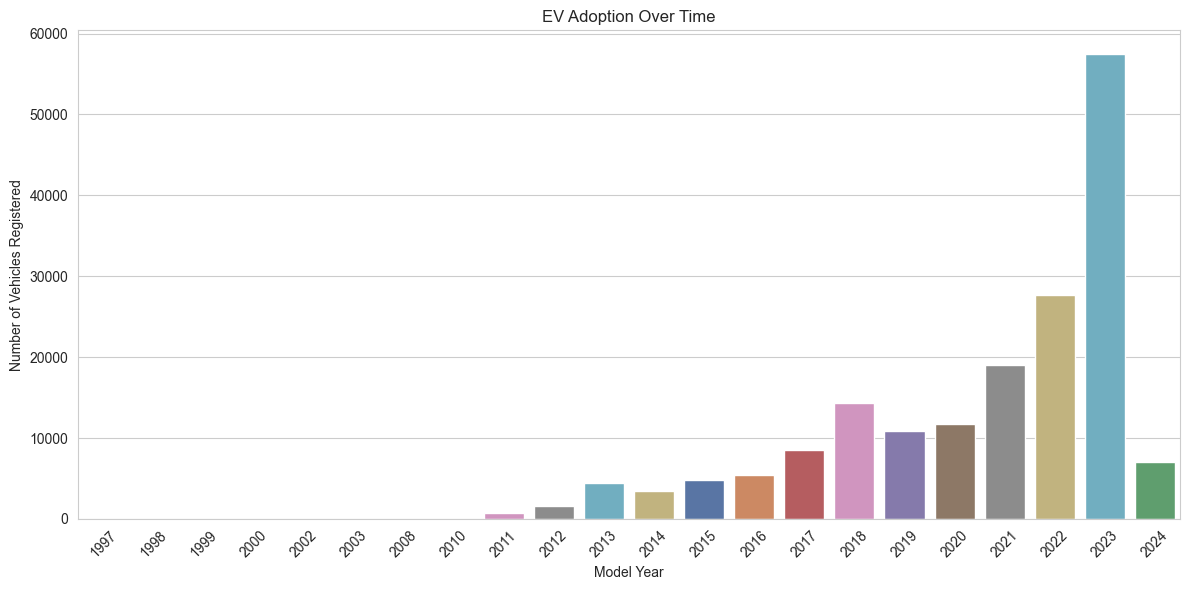

In [163]:
# EV Adoption Over Time

# Set the figure size for the plot
plt.figure(figsize=(12, 6))

# Calculate the count of electric vehicles for each model year and sort the result by the model year index
ev_adoption_by_year = ev_data['Model Year'].value_counts().sort_index()


# Create a bar plot using Seaborn, with model years on the x-axis and the count of electric vehicles on the y-axis
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, hue=ev_adoption_by_year, palette="deep", legend= False)


# Set the title of the plot
plt.title('EV Adoption Over Time')


# Set the label for the x-axis
plt.xlabel('Model Year')


# Set the label for the y-axis
plt.ylabel('Number of Vehicles Registered')


# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Adjust the layout of the plot to prevent overlapping elements
plt.tight_layout()

# Display the plot
plt.show()


Now, let’s start by selecting the top 3 counties based on EV registrations and then analyze the distribution of EVs within the cities of those counties:

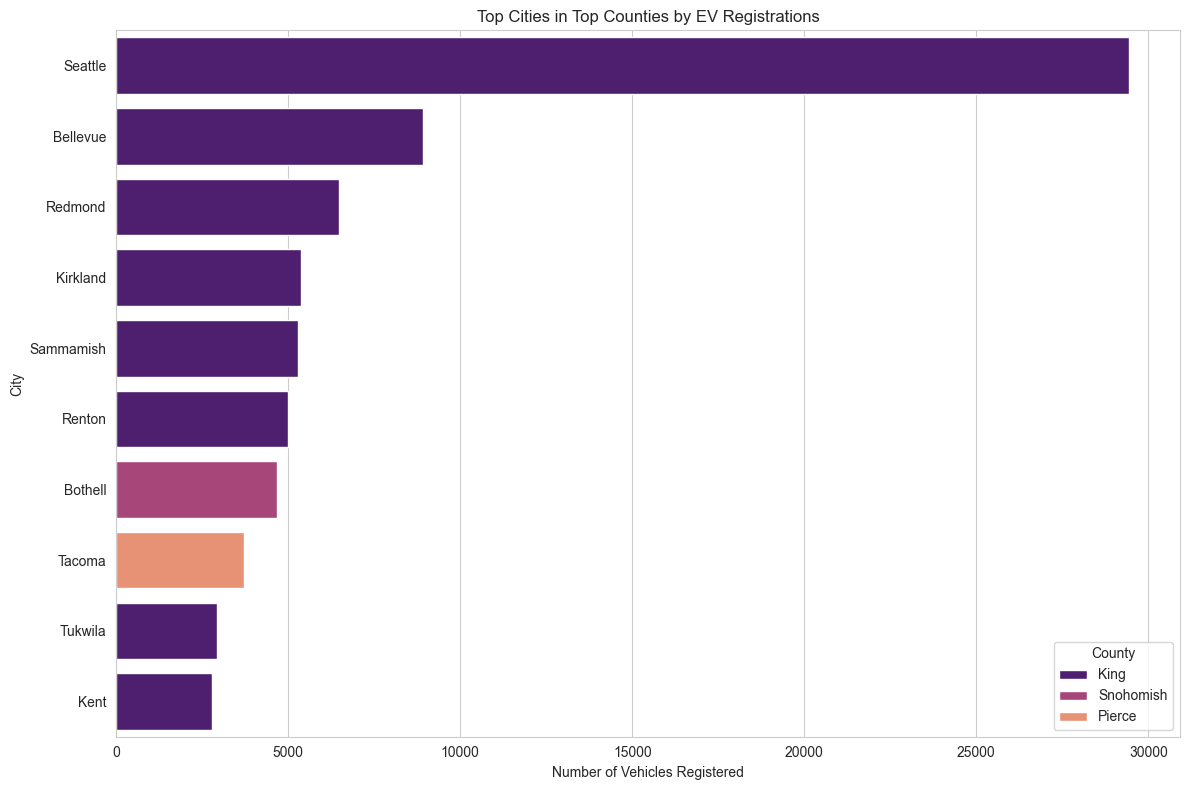

In [181]:
#Since I will be using the DOL as " EV registrations" I'm checking if there's no duplicated IDs 
check_for_duplicated = ev_data['DOL Vehicle ID'].duplicated().value_counts()


# Get the count of electric vehicles in each county
county_distribution = ev_data['County'].value_counts()  # Count the occurrences of each county

# Extract the top 3 counties with the highest counts
top_counties = county_distribution.head(3).index  # Extract the index labels of the top 3 counties

# "Creates" or filters the dataset for these top counties
top_counties_data = ev_data[ev_data['County'].isin(top_counties)]

# analyzing the distribution of EVs within the cities of these top counties
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualize the top 10 cities across these counties
top_cities = ev_city_distribution_top_counties.head(10)


plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="magma")
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()





Let’s explore the types of electric vehicles represented in this dataset. Understanding the breakdown between different EV types, such as Battery Electric Vehicles (BEV) and Plug-in Hybrid Electric Vehicles (PHEV), can provide insights into consumer preferences.

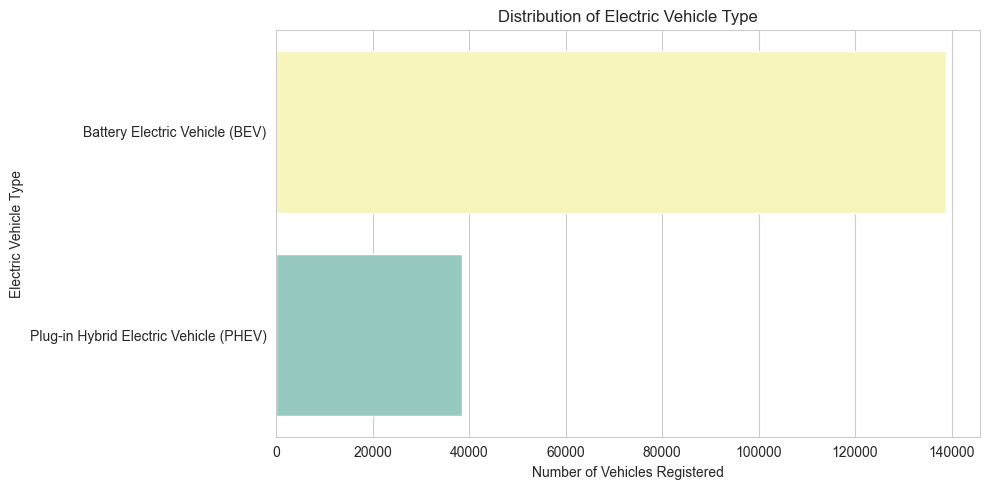

In [165]:
#Filtering and Counting the Values

ev_type = ev_data['Electric Vehicle Type'].value_counts().sort_index()

plt.figure(figsize=(10, 5))

# the hue parameter is used to add another dimension. Eventho I'm not using it, the terminal is calling it out. 
# So I just assigned a value a set legend to false, if it'd be true if would plot it.
sns.barplot(x=ev_type.values, y=ev_type.index, hue = ev_type, legend= False, palette="Set3")
plt.title('Distribution of Electric Vehicle Type')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()


Let’s now focus on the popularity of electric vehicle manufacturers and models among the registered vehicles. 
Let’s have a look at the most popular manufacturers and then drill down into the most popular models.

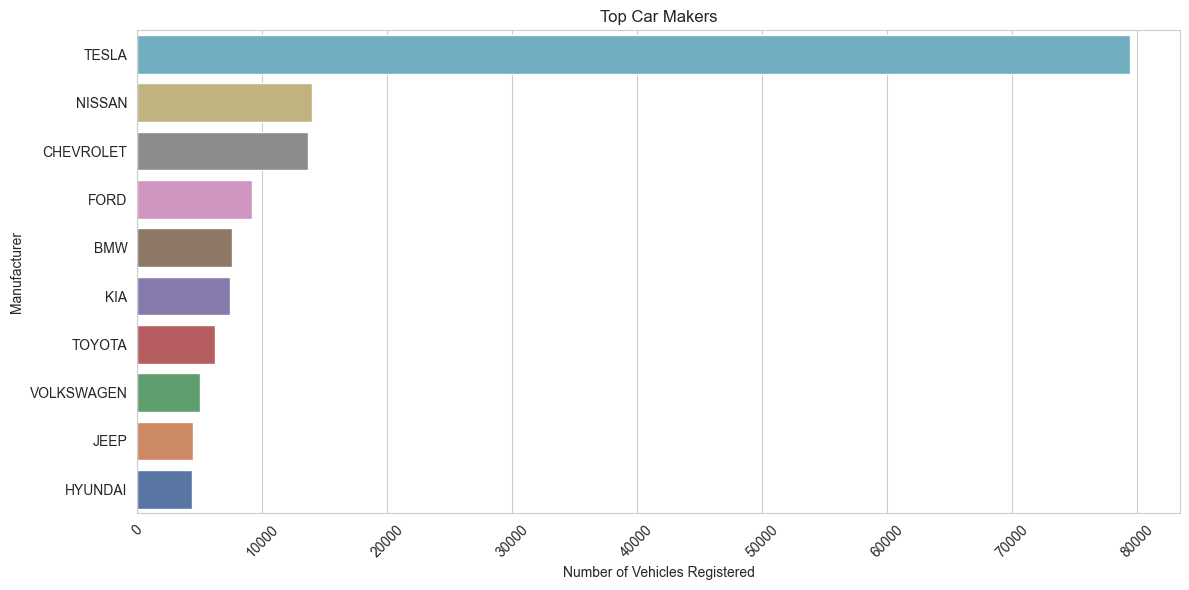

In [179]:

# Top Manufacturers / Make

car_makers = ev_data['Make'].value_counts().head(10)

#Plotting

plt.figure(figsize=(12, 6))
sns.barplot(x = car_makers.values, y = car_makers.index, hue = car_makers, legend = False, palette= "deep")
plt.title('Top Car Makers')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Manufacturer')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Next, let’s drill down into the most popular models within these top manufacturers to get a more detailed understanding of consumer preferences at the model level:

In [220]:
# Top Manufacturers / Make

car_makers = ev_data['Make'].value_counts().head(3).index

# First filter / create the Data Set 

sort_models_by_make = ev_data[ev_data['Make'].isin(car_makers)]

#Sort Top Models within Manufacturer 

top_models = sort_models_by_make.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

#Limit to top 10, the sort_value method used before already organized descending 
top_models_10 = top_models.head(10)

#Plotting 

plt.figure(figsize=(12,8))
sns.barplot(x ='Number of Vehicles', y = 'Car Model', hue = 'Make', data=top_models_10, palette='dark')
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="viridi")




ValueError: Could not interpret value `Car Model` for `y`. An entry with this name does not appear in `data`.

<Figure size 1200x800 with 0 Axes>